Two-step clustering üçün məşhur dataset olaraq **Titanic** datasetini seçə bilərik, çünki həm kateqorik, həm də ədədi (numeric) dəyişənlərə malikdir. Bu datasetdə sərnişinlərin sağ qalma ehtimalını təxmin etməyə çalışacağıq. Gəlin data understanding, preparation mərhələlərindən keçib Two-step clustering modeli quraq.

### 1. Data Understanding

**Titanic** datasetindəki bəzi əsas dəyişənlər bunlardır:
- `Survived`: Sərnişinin sağ qalıb-qalmadığını göstərən hədəf dəyişəni (0 = Xeyr, 1 = Bəli).
- `Pclass`: Sərnişinlərin bilet sinfi (1, 2, 3).
- `Sex`: Sərnişinin cinsiyyəti.
- `Age`: Sərnişinin yaşı.
- `SibSp`: Gəmidə olan bacı-qardaş və ya həyat yoldaşının sayı.
- `Parch`: Gəmidə olan valideyn və ya uşaqların sayı.
- `Fare`: Biletin qiyməti.
- `Embarked`: Gəmidən haradan mindiyini göstərir (C = Cherbourg, Q = Queenstown, S = Southampton).

### 2. Data Preparation

İlk addım olaraq datasetdəki boş (missing) dəyərləri idarə etməliyik və kateqorik dəyişənləri ədədi formaya çevirməliyik.

```python
# Lazımi kitabxanaların yüklənməsi
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Titanic datasının yüklənməsi
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Data anlayışı (ilk 5 sətir)
print(df.head())

# Boş dəyərlərin yoxlanması
print(df.isnull().sum())

# Missing dəyərləri 'Age' sütununda orta ilə doldururuq
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# 'Embarked' sütunundakı boş dəyərləri ən çox təkrarlanan dəyərlə doldururuq
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Categorical dəyişənlərin ədədi dəyərlərə çevrilməsi
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])  # Male = 1, Female = 0
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])  # C = 0, Q = 1, S = 2

# Hazır olan data anlayışını yenidən yoxlayırıq
print(df.head())
```

### 3. Model Qurulması

Two-step clustering modeli üçün sklearn-də birbaşa hazır funksiya yoxdur, lakin biz bunu bir növ yaxınlaşma olaraq kəşf edə bilərik, bunun üçün **Birch** və ya digər metodlardan istifadə edəcəyik. Predict mərhələsini də həyata keçirəcəyik.

```python
from sklearn.cluster import Birch

# Model üçün uyğun dəyişənlərin seçilməsi
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]

# Birch modelini qururuq
birch = Birch(n_clusters=None)  # Burada n_clusters = None, avtomatik təyin etmək üçün
birch.fit(X)

# Klaster nəticələrini alırıq
df['Cluster'] = birch.predict(X)

# Nəticəyə baxış
print(df[['Survived', 'Cluster']].head())

# Klasterlərə əsaslanaraq təhlil edirik
print(df.groupby('Cluster')['Survived'].mean())
```

### 4. Təxmin (Prediction)

Artıq klasterlərimizə görə `Survived` (sağ qalma) təhlili apardıq. Hər klasterin sağ qalma nisbətini analiz etdik. Bu nəticələr bizə sərnişinlərin müəyyən xüsusiyyətlərinə görə sağ qalma ehtimalını təxmin etməyə kömək edir.

Bu yanaşma Two-step clustering modelini birbaşa təmsil edir, çünki iki fərqli növ dəyişəni (kateqorik və ədədi) birləşdirərək klaster yaratdıq.

## Titanic datasının yüklənməsi

In [1]:
import pandas as pd
# Titanic datasının yüklənməsi
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
columns=list(df.drop('Survived', axis=1).columns)
columns.append('Survived')
df = pd.DataFrame(data=df, columns=columns)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Data Preparation

## Data anlayışı (ilk 5 sətir)

In [2]:
# Data anlayışı (ilk 5 sətir)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Boş dəyərlərin yoxlanması

In [3]:
# Boş dəyərlərin yoxlanması
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

## Missing dəyərləri 'Age' sütununda orta ilə doldururuq

In [4]:
# Missing dəyərləri 'Age' sütununda orta ilə doldururuq

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [5]:
# 'Embarked' sütunundakı boş dəyərləri ən çox təkrarlanan dəyərlə doldururuq
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


## Outliers Check

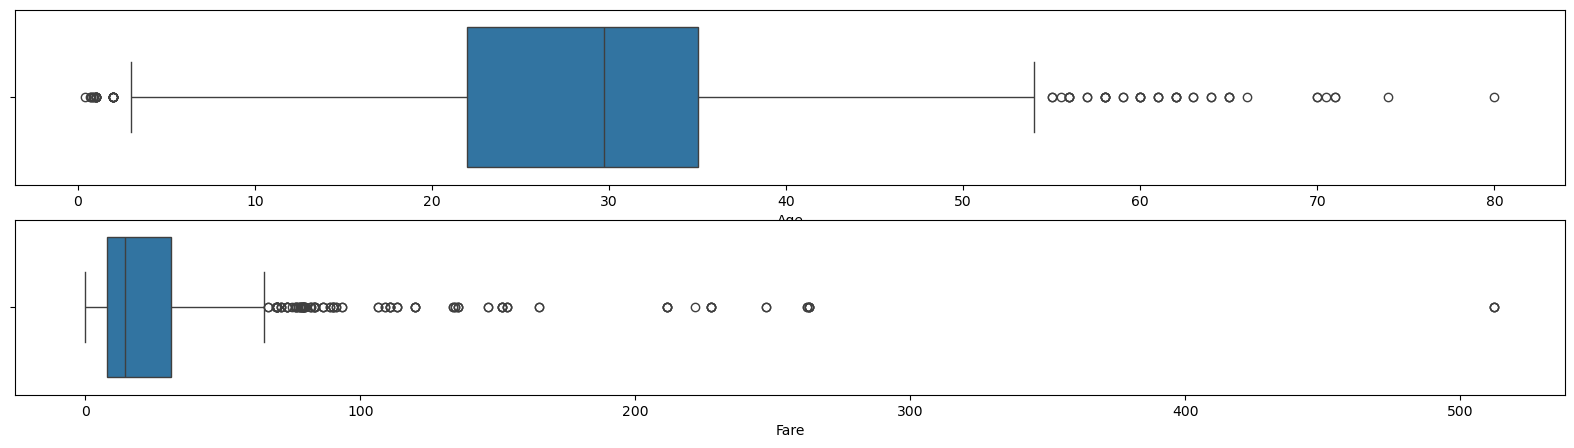

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df[['Age', "Fare"]].columns), figsize=(20, 5))
for i in range(len(df[['Age', "Fare"]].columns)):
    sns.boxplot(ax=axes[i], x=df[['Age', "Fare"]].columns[i], data=df)

In [7]:
def boxplot_clip(col):
    Q1 = df.loc[:, col].quantile(0.25)
    Q3 = df.loc[:, col].quantile(0.75)
    IQR = Q3 - Q1
    
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR
    
    df[col] = df[col].clip(lower=lowerbound, upper=upperbound)
    
for i in df[['Age', "Fare"]].columns:
    boxplot_clip(i)

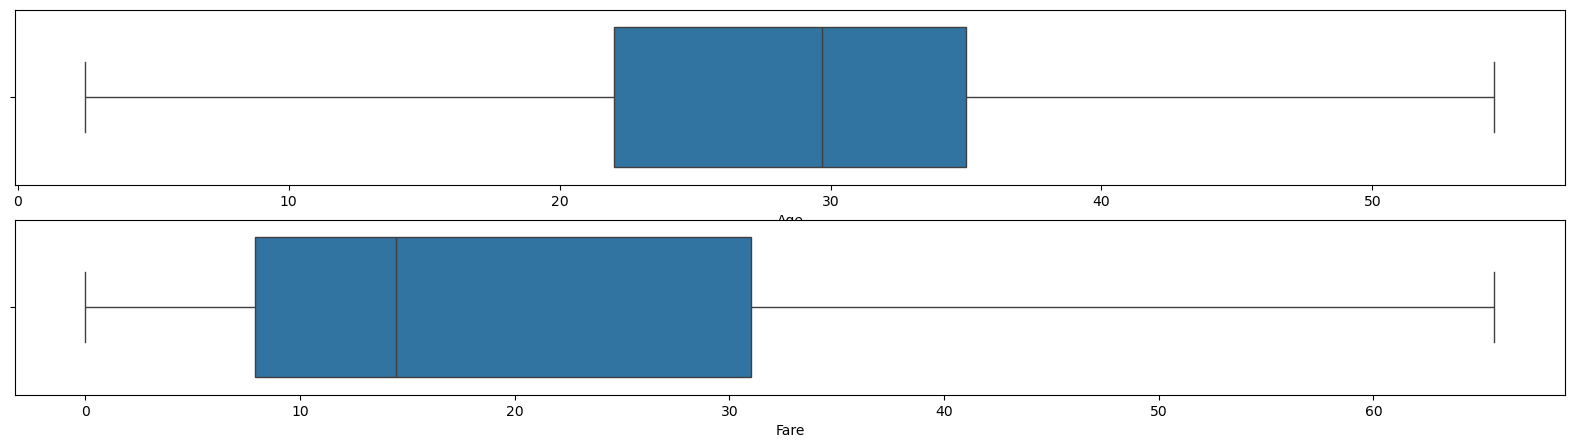

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df[['Age', "Fare"]].columns), figsize=(20, 5))
for i in range(len(df[['Age', "Fare"]].columns)):
    sns.boxplot(ax=axes[i], x=df[['Age', "Fare"]].columns[i], data=df)

## Categorical dəyişənlərin ədədi dəyərlərə çevrilməsi

In [9]:
# # Categorical dəyişənlərin ədədi dəyərlərə çevrilməsi

# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# df['Sex'] = labelencoder.fit_transform(df['Sex'])  # Male = 1, Female = 0
# df['Embarked'] = labelencoder.fit_transform(df['Embarked'])  # C = 0, Q = 1, S = 2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Survived: Sərnişinin sağ qalıb-qalmadığını göstərən hədəf dəyişəni (0 = Xeyr, 1 = Bəli).
# Pclass: Sərnişinlərin bilet sinfi (1, 2, 3).
# Sex: Sərnişinin cinsiyyəti.
# Age: Sərnişinin yaşı.
# SibSp: Gəmidə olan bacı-qardaş və ya həyat yoldaşının sayı.
# Parch: Gəmidə olan valideyn və ya uşaqların sayı.
# Fare: Biletin qiyməti.
# Embarked: Gəmidən haradan mindiyini göstərir (C = Cherbourg, Q = Queenstown, S = Southampton).

In [12]:
df[['Pclass', "Sex", 'Embarked']] = df[['Pclass', "Sex", 'Embarked']].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    object 
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [14]:
import copy
df_encoder = copy.deepcopy(df)

In [15]:
df_encoder = pd.get_dummies(data=df_encoder, columns=df_encoder.drop(['Ticket', 'Cabin', "Name"], axis=1).\
                            select_dtypes('object').columns, drop_first=True, dtype='int')

In [16]:
df_encoder

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,65.6344,C85,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,1,0,1,0,1
887,888,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,0,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,0,1
889,890,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,0,0,1,0,0


## Hazır olan data anlayışını yenidən yoxlayırıq

In [17]:
# Hazır olan data anlayışını yenidən yoxlayırıq
df_encoder

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,65.6344,C85,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,0,1,0,1,0,1
887,888,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,1,0,0,0,0,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1,0,0,1
889,890,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,0,0,1,0,0


## Model üçün uyğun dəyişənlərin seçilməsi

In [18]:
# Model üçün uyğun dəyişənlərin seçilməsi
# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_encoder.drop(['Ticket', 'Cabin', "Name", "Survived", 'PassengerId'], axis=1)

In [19]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,1,1,0,1
1,38.000000,1,0,65.6344,0,0,0,0,0
2,26.000000,0,0,7.9250,0,1,0,0,1
3,35.000000,1,0,53.1000,0,0,0,0,1
4,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,1,0,1
887,19.000000,0,0,30.0000,0,0,0,0,1
888,29.699118,1,2,23.4500,0,1,0,0,1
889,26.000000,0,0,30.0000,0,0,1,0,0


## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
column_names = X[["Age", "Fare"]].columns
index_name = X[["Age", "Fare"]].index
sc = StandardScaler()
X[["Age", "Fare"]] = sc.fit_transform(X[["Age", "Fare"]])
X[["Age", "Fare"]] = pd.DataFrame(data=X[["Age", "Fare"]], index=index_name, columns=column_names)

In [21]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.611917,1,0,-0.820552,0,1,1,0,1
1,0.715304,1,0,2.031623,0,0,0,0,0
2,-0.280111,0,0,-0.787578,0,1,0,0,1
3,0.466450,1,0,1.419297,0,0,0,0,1
4,0.466450,0,0,-0.781471,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,-0.197160,0,0,-0.539655,1,0,1,0,1
887,-0.860771,0,0,0.290823,0,0,0,0,1
888,0.026735,1,2,-0.029155,0,1,0,0,1
889,-0.280111,0,0,0.290823,0,0,1,0,0


## Optimal Klaster Sayını Necə Təyin Etmək

## Birch Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

from sklearn.cluster import Birch

# Fərqli klaster saylarını yoxlayın
for n_clusters in range(2, 10):
    birch = Birch(n_clusters=n_clusters)
    cluster_labels = birch.fit_predict(X)
    
    # Silhouette score-u hesablayırıq
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Klaster sayı: {n_clusters}, Silhouette Score: {silhouette_avg}")


Klaster sayı: 2, Silhouette Score: 0.3125288628070362
Klaster sayı: 3, Silhouette Score: 0.35201108948856863
Klaster sayı: 4, Silhouette Score: 0.3533359060058606
Klaster sayı: 5, Silhouette Score: 0.3053370822156929
Klaster sayı: 6, Silhouette Score: 0.2537765296340095
Klaster sayı: 7, Silhouette Score: 0.24968720801770125
Klaster sayı: 8, Silhouette Score: 0.2633880427548119
Klaster sayı: 9, Silhouette Score: 0.2733807502777346


## Birch Elbow Method

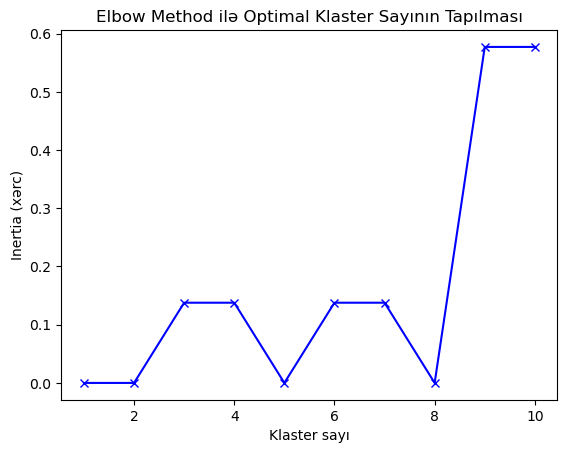

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# Mümkün klaster sayı aralığını təyin edirik
cluster_range = range(1, 11)
inertias = []

# Hər bir klaster sayı üçün inertia dəyərini hesablayırıq
for n_clusters in cluster_range:
    birch = Birch(n_clusters=n_clusters)
    birch.fit(X)
    
    # Inertia oxşar olaraq klaster mərkəzlərindən məsafələrin cəmi kimi qiymətləndirilir
    labels = birch.predict(X)
    inertia = np.sum(np.min(np.square(X - birch.subcluster_centers_[labels]), axis=1))
    inertias.append(inertia)

# Elbow metodunu vizuallaşdırmaq üçün qrafik çəkirik
plt.plot(cluster_range, inertias, 'bx-')
plt.xlabel('Klaster sayı')
plt.ylabel('Inertia (xərc)')
plt.title('Elbow Method ilə Optimal Klaster Sayının Tapılması')
plt.show()


## Birch modelini qururuq

In [24]:
# from sklearn.cluster import Birch

# birch = Birch(n_clusters=2)  # Burada klaster sayını 5 olaraq təyin edirik
# birch.fit(X)

# clusters = birch.predict(X)

## KPrototypes Elbow Method

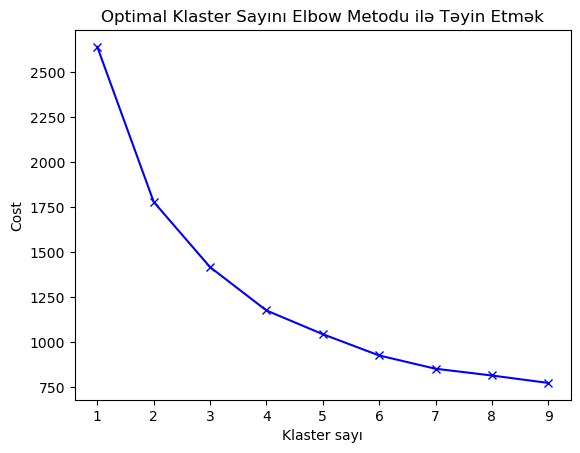

In [25]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

cost = []
K = range(1, 10)  # 1-dən 10-a qədər klaster sayı yoxlanacaq
for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', random_state=42)
    kproto.fit_predict(X, categorical=[1,2,4,5,6,7,8])  # Kateqorik sütun indekslərini daxil edin
    cost.append(kproto.cost_)  # Hər klaster üçün cost dəyəri

# Elbow qrafiki
plt.plot(K, cost, 'bx-')
plt.xlabel('Klaster sayı')
plt.ylabel('Cost')
plt.title('Optimal Klaster Sayını Elbow Metodu ilə Təyin Etmək')
plt.show()

## KPrototypes Silhouette Score

In [26]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import pandas as pd

# Silhouette skorlarını saxlamaq üçün siyahı
silhouette_scores = []

# Klaster saylarını yoxlamaq (1-dən 10-a qədər)
for n_clusters in range(2, 11):  # 2-dən 10-a qədər klaster sayını yoxlayırıq
    # Model qurulması
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42)
    clusters = kproto.fit_predict(X, categorical=[1,2,4,5,6,7,8])  # Kateqorik sütun indeksləri

    # Silhouette skoru yalnız rəqəmsal sütunlar üçün
    silhouette_avg = silhouette_score(X.select_dtypes(['int64', 'float64']), clusters)
    silhouette_scores.append((n_clusters, silhouette_avg))

    print(f'Klaster sayı: {n_clusters}, Silhouette Skoru: {silhouette_avg}')

# Silhouette skorları
silhouette_df = pd.DataFrame(silhouette_scores, columns=['Klaster sayı', 'Silhouette Skoru'])
print(silhouette_df)

Klaster sayı: 2, Silhouette Skoru: 0.3852325373814771
Klaster sayı: 3, Silhouette Skoru: 0.27775051919191235
Klaster sayı: 4, Silhouette Skoru: 0.34941040014870234
Klaster sayı: 5, Silhouette Skoru: 0.17108479695720247
Klaster sayı: 6, Silhouette Skoru: 0.17772598364833317
Klaster sayı: 7, Silhouette Skoru: 0.10441583711958291
Klaster sayı: 8, Silhouette Skoru: 0.07957999222716983
Klaster sayı: 9, Silhouette Skoru: 0.06471462960725703
Klaster sayı: 10, Silhouette Skoru: 0.11811640293238568
   Klaster sayı  Silhouette Skoru
0             2          0.385233
1             3          0.277751
2             4          0.349410
3             5          0.171085
4             6          0.177726
5             7          0.104416
6             8          0.079580
7             9          0.064715
8            10          0.118116


## K-Prototypes modeli qururuq

In [27]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=[1,2,4,5,6,7,8])  # Kategorik dəyişən sütunlarını qeyd edirsiniz

## Klaster nəticələrini alırıq

In [28]:
df['Cluster'] = clusters

## Nəticəyə baxış

In [29]:
df[['Survived', 'Cluster']].head()

,Survived,Cluster
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0


In [30]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cluster
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C85,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


In [31]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
pd.crosstab(df.Survived, df.Cluster)

Cluster,0,1
Survived,,
0,453,96
1,207,135


In [33]:
df.Cluster.value_counts()

Cluster
0    660
1    231
Name: count, dtype: int64

## Diffirence Original Cluster and Birch Cluster

In [34]:
print('Diffirence count:', len(df[df.Survived != df.Cluster]))
df[df.Survived != df.Cluster]

Diffirence count: 303


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cluster
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1,0
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1,0
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
